Fourier

Task 1

      Time    Signal
0    0.000 -0.058457
1    0.001  1.519155
2    0.002  1.261093
3    0.003 -0.333773
4    0.004 -1.234519
..     ...       ...
995  0.995 -0.342217
996  0.996  0.239696
997  0.997 -0.605242
998  0.998 -0.442325
999  0.999 -0.972253

[1000 rows x 2 columns]


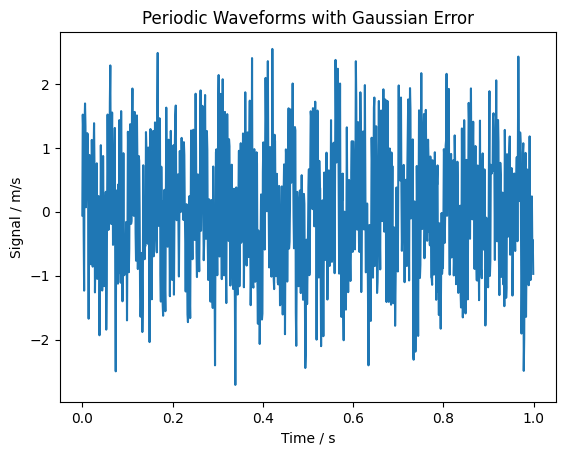

In [31]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# turn into dataframe
df = pd.read_csv("signal.csv")
print(df)

#plot signal
plt.title("Periodic Waveforms with Gaussian Error")
plt.xlabel("Time / s")
plt.ylabel("Signal / m/s")
plt.plot(df["Time"],df["Signal"])

Task 2

In [32]:
# import numpy for Fourier Spectrum
import numpy as np

# N = number of samples, interval = sample spacing
N = 1000
interval = 0.001 

# I would write test to ensure N is indeed the length of 
# the arrays df["Time"] and df["Signal"]. 

# Generate fourier spectrum, an array of complex numbers
# Since the input signal is real, there is no information 
# on the negative frequency components, so these are omitted.
# Normalise amplitudes and double since half the amplitude 
# is in negative frequency counterpart after the transform,
# except for at 0.
fourier = 2*np.fft.rfft(df["Signal"],norm="forward")
fourier[0] = fourier[0] / 2
# The frequency bins in the frequency domain.
freq = np.fft.rfftfreq(N,d=interval)

# Write test to ensure length of fourier and length of freq are equal.

# Calculate amplitude, phase and power from complex numbers in fourier.
amplitude = np.abs(fourier)
phase = np.angle(fourier)
power = amplitude ** 2

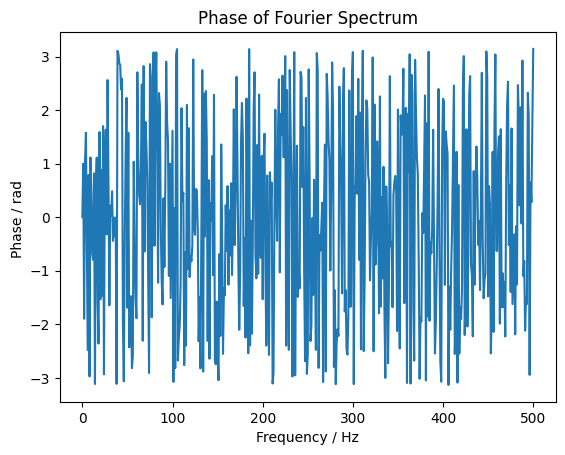

In [33]:
# Plot phase
plt.title("Phase of Fourier Spectrum")
plt.xlabel("Frequency / Hz")
plt.ylabel("Phase / rad ")
plt.plot(freq, phase)
# Note: I can't see much useful information that can be gathered from this phase graph as it is.

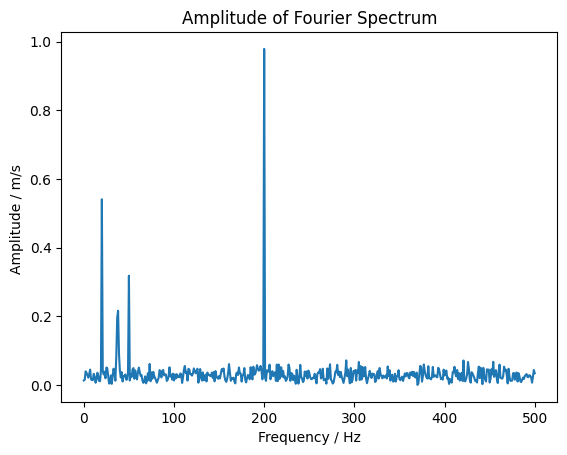

In [34]:
# Plot amplitude
plt.title("Amplitude of Fourier Spectrum")
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / m/s ")
plt.plot(freq, amplitude)

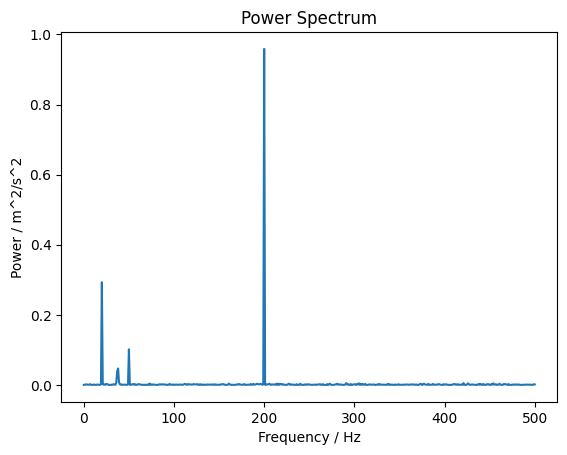

In [35]:
# Power spectrum
plt.title("Power Spectrum")
plt.xlabel("Frequency / Hz")
plt.ylabel("Power / m^2/s^2")
plt.plot(freq, power)
plt.show()

Windowing 

Since the time series data collected is from a finite time duration, the Fourier transform can result in increased amplitude in frequencies not present in the original signal. The result is spectral leakage, where it appears that energy in one frequency leaks to others. Windowing can be used to minimise the effects of spectral leakage. The problem can be caused by performing the FFT over a noninteger number of cycles of some frequency present in the original signal. By multipling the whole signal by an envelope the endpoints gradually go to zero, decreasing spectral leakage.

Resource used: National instruments, "Understanding FFTs and Windowing", https://download.ni.com/evaluation/pxi/Understanding%20FFTs%20and%20Windowing.pdf

In this case the Hanning window can be used as it has a relatively high side lobe roll-off rate and our signal has interfering frequencies far from the peak. It is also said to be "satisfactory in 95 percent of cases". The Parzen window could also be used for an even higher side lobe roll of rate.

Resource used: https://vru.vibrationresearch.com/lesson/tables-of-window-function-details/

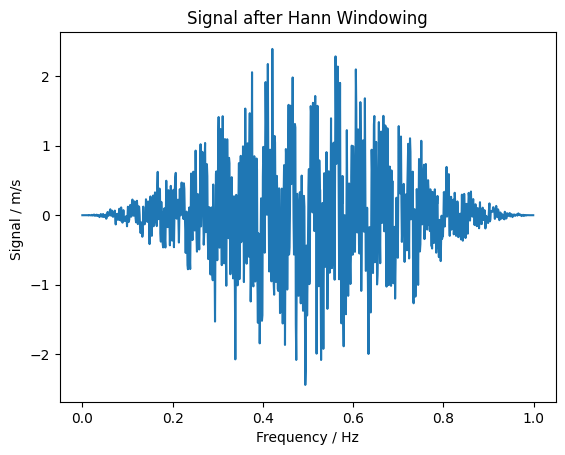

In [36]:
# Use Hanning window function and perform element-wise multiplication.
window = np.hanning(N)
signalW= np.multiply(df["Signal"],window)

# Plot signal after windowing
plt.title("Signal after Hann Windowing")
plt.xlabel("Frequency / Hz")
plt.ylabel("Signal / m/s ")
plt.plot(df["Time"], signalW)

# Apply Fourier transform
fourierW = 2*np.fft.rfft(signalW ,norm="forward")
fourierW[0] = fourierW[0] / 2
# The frequency bins in the frequency domain.
freqW = np.fft.rfftfreq(N,d=interval)

# Write test to ensure length of freqW and fourierW are equal.

# Calculate power 
powerW = np.abs(fourierW) ** 2

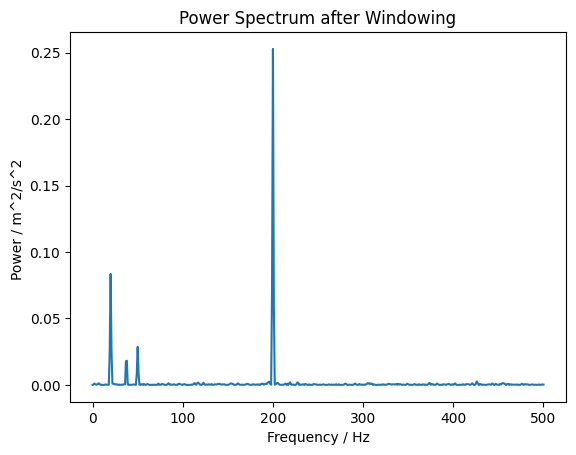

In [37]:
# Plot amplitudeW
plt.title("Power Spectrum after Windowing")
plt.xlabel("Frequency / Hz")
plt.ylabel("Power / m^2/s^2 ")
plt.plot(freqW, powerW)

# Note: I have not been able to see a significant effect of performing windowing to the power spectrum.

Task 3

[(200.0, 0.9791156662396295), (20.0, 0.5412310036793494), (50.0, 0.31861668051924963), (38.0, 0.2165964446294898), (37.0, 0.19696184933444513), (39.0, 0.09073251394556212), (36.0, 0.08268965887842386), (291.0, 0.07201492426491087), (421.0, 0.07177450969126109), (454.0, 0.06781459194366869), (426.0, 0.06738234589206077), (305.0, 0.06727923160624967), (73.0, 0.06169797296960683), (161.0, 0.06122861236891861), (273.0, 0.06067506199618101), (377.0, 0.06017191518344958), (227.0, 0.060011463488161554), (216.0, 0.059953709035155046), (214.0, 0.05979083310316279), (461.0, 0.05963281537598391), (206.0, 0.05951795045723806), (281.0, 0.05903167175056858), (240.0, 0.05895234041523235), (192.0, 0.05804692433892801), (373.0, 0.05593965746411555), (196.0, 0.055924516100365425), (112.0, 0.05582329785704263), (307.0, 0.05518751617395836), (382.0, 0.05509254745239026), (337.0, 0.05431528669548219), (438.0, 0.05382323662835742), (466.0, 0.05361022421238242), (188.0, 0.05358581355571897), (411.0, 0.053320

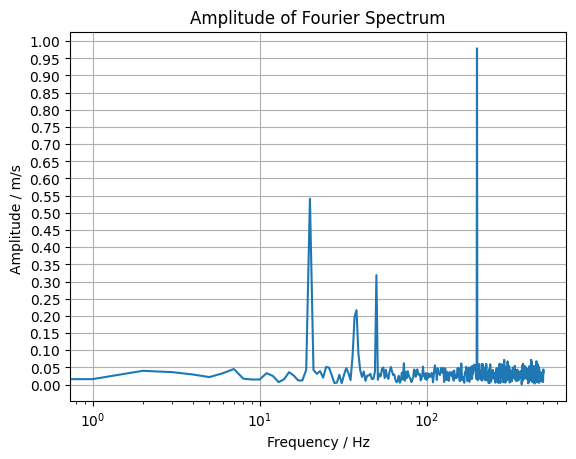

In [38]:
# Plot amplitude with logarithmic scale
plt.title("Amplitude of Fourier Spectrum")
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / m/s ")
plt.xscale("log")
# grid for ease of reading
plt.grid()
# arrange how often ticks appear in y-axis
plt.yticks(np.arange(0, 1.05, step=0.05))
# print (freq, amplitude) pairs sorted by descending amplitude
pairs_sorted = sorted(list(zip(freq,amplitude)), key = lambda pair: pair[1], reverse=True)
print(pairs_sorted)

plt.plot(freq, amplitude)

Assumption: All the peaks in amplitude after the Fourier transoform are due to waves present in the original signal and not due to effects like spectral leakage.

Waves observed are:

Freq:20Hz, Amplitude: 0.54m/s

Freq:38Hz, Amplitude: 0.22m/s

Freq:50Hz, Amplitude: 0.32m/s

Freq:200Hz, Amplitude: 0.98m/s 

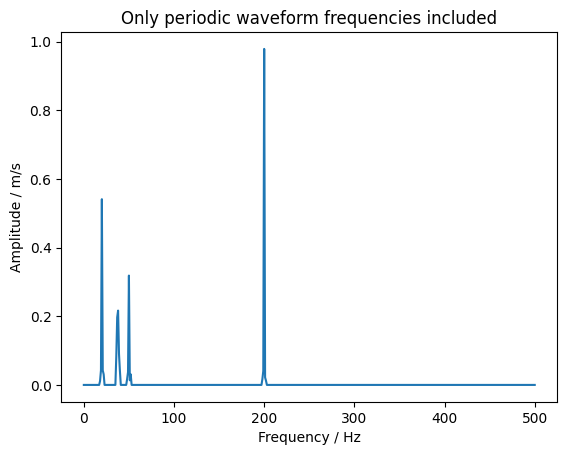

In [39]:
# Estimating Variance

# Method 1: Only include frequencies of high amplitude and perform
# an inverse Fourier transform. Then, subtract this from the signal 
# and analyse the error term.
def include_freq(freqs_included,delta,amplitude,freq):
    N = len(amplitude)
    result = [0]*N
    pos = 0
    while (pos<N):
        for f in freqs_included:
            if freq[pos]>=f-delta and freq[pos]<=f+delta:
                result[pos] = amplitude[pos]
                break
        pos += 1
    return result

# I would write a testing module to test this function, include_freq, over
# many possible inputs. I would use the pytest module for this.
# assert include_freq([],0,[1,2,3,4],[1,2,3,4]) == [0,0,0,0] - test for empty freqs_included
# assert include_freq([],2,[1,2,3,4],[1,2,3,4]) == [0,0,0,0] - same test as above but delta non-zero
# assert include_freq([1,2,3],0,[2,3,4,5],[1,2,3,4]) == [2,3,4,0] - standard sample
# test what happens when amplitude and freq are not of the same length. 
#   if len(freq) < N will have index out of bound error, otherwise likely no problem.
# test what happens when delta negative - should never include any freq.
#   assert include_freq([1,2,3],-1,[2,3,4,5],[1,2,3,4]) == [0,0,0,0]
# Could also generate random inputs and output pairs for testing. This is black box testing(just inputs and outputs.)

freqs_included = [20,38,50,200]
delta = 2
periodic_freq = include_freq(freqs_included,delta,amplitude,freq)
plt.title("Only periodic waveform frequencies included")
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / m/s")
plt.plot(freq,periodic_freq)

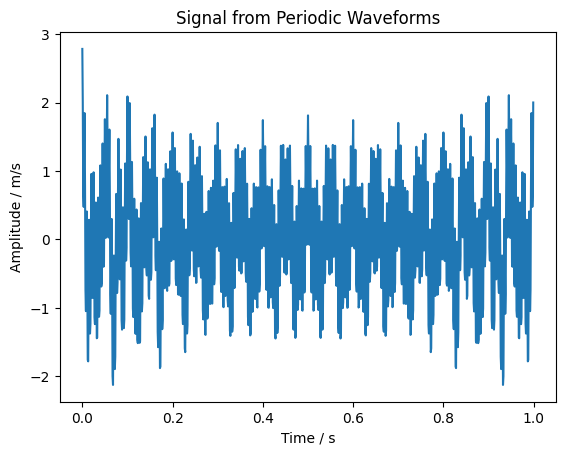

In [40]:
# Continuing on from method 1, now we perform an inverse 
# Fourier transform to get back the pure signal.

# perform irfft and do scaling (order of scaling doesn't matter as Fourier transform is a linear operation).
periodic_signal = 0.5 * np.fft.irfft(periodic_freq, norm="forward")

# plot periodic waveforms
plt.title("Signal from Periodic Waveforms")
plt.xlabel("Time / s")
plt.ylabel("Amplitude / m/s")
plt.plot(df["Time"],periodic_signal)

Mean:  0.013456496071490725
Variance:  1.6853814279100139


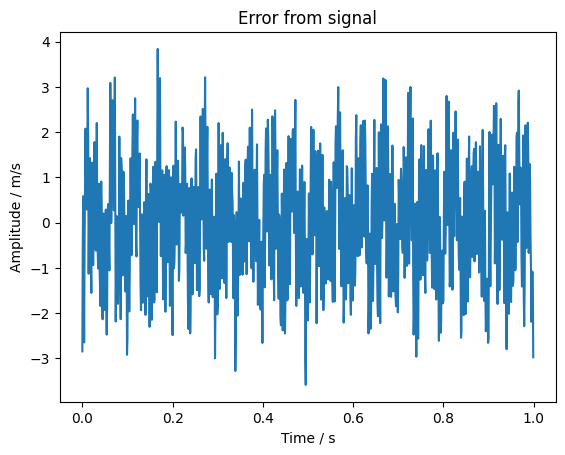

In [41]:
# the error in the signal is left when periodic waveforms are removed
error = df["Signal"] - periodic_signal

# plot error
plt.title("Error from signal")
plt.xlabel("Time / s")
plt.ylabel("Amplitude / m/s")
plt.plot(df["Time"],error)

# calculate mean and variance
mean = np.mean(error)
variance = np.var(error)
print("Mean: ", mean)
print("Variance: ",variance)

# Estimate of variance is 1.69 m^2/s^2, using the assumption that all the high amplitude frequencies detected in the Fourier
# spectrum are indeed the frequencies of the periodic waveforms and only the remaining difference is the gaussian 
# error.

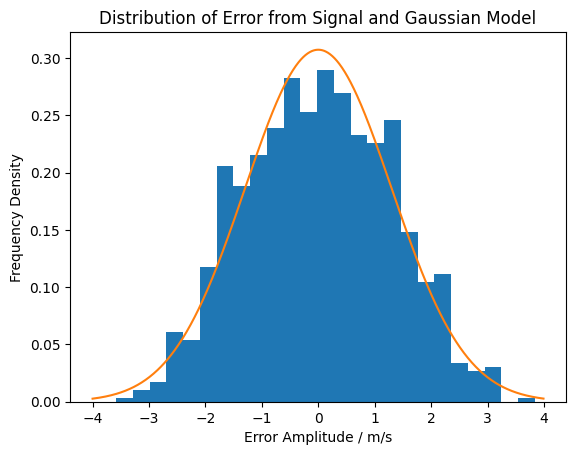

In [42]:
# Plotting distribution of error term as a histogram, and overlayed with the Gaussian distribution with calculated variance.
bins = 25
plt.hist(error,bins,density=True)
plt.title("Distribution of Error from Signal and Gaussian Model")
plt.xlabel("Error Amplitude / m/s")
plt.ylabel("Frequency Density")
plt.plot()
from scipy.stats import norm
x_axis = np.arange(-4, 4, 0.01)
sd = variance ** 0.5
z_mean = 0
plt.plot(x_axis, norm.pdf(x_axis, z_mean, sd)) 

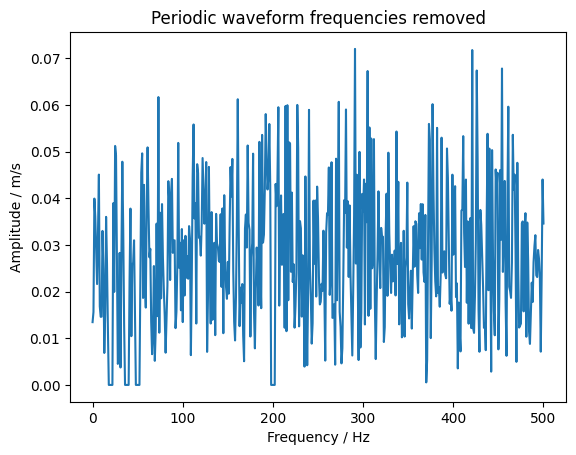

In [43]:
# Method 2: Mask the frequencies of periodic waveforms and then apply irfft to get error.
# If a certain frequency is within delta of frequencies removed, then it is set to an amplitude of 0.
def remove_freq(freqs_removed,delta,amplitude,freq):
    N = len(amplitude)
    result = amplitude
    pos = 0
    while (pos<N):
        for f in freqs_removed:
            if freq[pos]>=f-delta and freq[pos]<=f+delta:
                result[pos] = 0
                break
        pos += 1
    return result

# A similar testing module to that of include_freq can be used to test this function,
# remove_freq. 
# assert remove_freq([],0,[1,2,3,4],[1,2,3,4]) == [1,2,3,4] - test for empty freqs_removed
# assert include_freq([],2,[1,2,3,4],[1,2,3,4]) == [1,2,3,4] - same test as above but delta non-zero
# assert include_freq([1,2,3],0,[2,3,4,5],[1,2,3,4]) == [0,0,0,5] - standard sample
# test what happens when amplitude and freq are not of the same length. 
#   if len(freq) < N will have index out of bound error, otherwise likely no problem.
# test what happens when delta negative - should never remove any freq.
#   assert include_freq([1,2,3],-1,[2,3,4,5],[1,2,3,4]) == [2,3,4,5]
# I could also add tests for when inputs of the wrong type are provided, such as a string for
# delta, ands what error would be raised in response.

# remove frequencies of periodic waveforms.
freqs_removed = [20,38,50,200]
delta = 2
error_freq = remove_freq(freqs_removed,delta,amplitude,freq)

#plot spectrum after removal
plt.title("Periodic waveform frequencies removed")
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / m/s")
plt.plot(freq,error_freq)

Mean:  0.006728248035745363
Variance:  0.24508208660741143


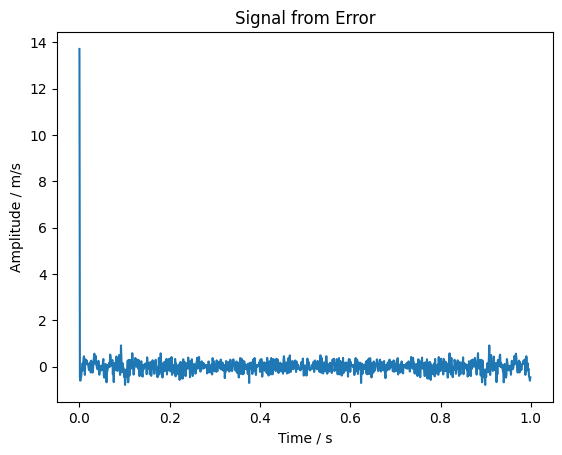

In [44]:
# Perform inverse FFT to get error signal
error_signal = 0.5 * np.fft.irfft(error_freq, norm="forward")

# plot error
plt.title("Signal from Error")
plt.xlabel("Time / s")
plt.ylabel("Amplitude / m/s")
plt.plot(df["Time"],error_signal)

# calculate mean and variance
print("Mean: ",np.mean(error_signal))
print("Variance: ",np.var(error_signal))

# Unusual spike at time = 0s, and variance is very different to result obtained by method 1. 
# Here it is calculated to be 0.25 m^2/s^2. It appears that performing an IFFT on this limited 
# dataset may be causing issues due to duration of time of signal, and finite sampling rate. 
# So, I think my best estimate would be the value obtained by method 1 as we only inverse transformed 
# pure waveforms which is more reliable.

In [45]:
# The fourier transofrm transforms the signal from the time domain to the frequency domain. So, the amplitudes of
# various signals that sum to make the original signal can be read off from the Fourier Spectrum.
# From above, the waves observed are of frequencies 20Hz, 38Hz, 50Hz and 200Hz. Their amplitudes and the information
# on the Gaussian error term with mean zero added is summarised in a dictionary data structure below.

waves_and_error = {"wave frequency / Hz": [20,38,50,200], "wave amplitude / m/s": [0.54,0.22,0.32,0.98], "variance of error / m^2/s^2": variance}